In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# 데이터 불러오기
(X_train,_),(X_test,_) = mnist.load_data() # 라벨 데이터는 필요없음
print(X_train.shape, X_test.shape)

# 데이터 전처리
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
# 모델 구성
autoencoder = Sequential()

In [8]:
# 인코더
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [9]:
# 디코더
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [10]:
# 모델 구성 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [11]:
# 모델 컴파일 및 학습
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train,X_train,epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 9s 13ms/step - loss: 0.2122 - val_loss: 0.1335
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1235 - val_loss: 0.1138
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1105 - val_loss: 0.1055
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1042 - val_loss: 0.1006
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1006 - val_loss: 0.0980
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0982 - val_loss: 0.0959
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0965 - val_loss: 0.0944
Epoch 8/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0953 - val_loss: 0.0933
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0942 - val_loss: 0.0927
Epoch 10/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0932 - val_lo

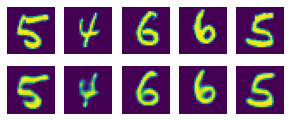

In [12]:
# 결과 출력
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지
ae_imgs = autoencoder.predict(X_test) 

plt.figure(figsize=(7, 2))  

for i, image_idx in enumerate(random_test):  
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  # 원본 테스트 이미지
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  # 오토인코딩 결과
   ax.axis('off')
plt.show()